In [1]:
import pandas as pd

In [2]:
df_energy = pd.read_csv('/media/sagarkumar/New Volume/SAGAR/ENERGYAUDIT.csv', low_memory=False)

In [3]:
df_energy.columns.str.strip()

Index(['Unnamed: 0', 'MD_DATE', 'RDG_DATE', 'SYSTEM_DATE', 'CLUSTER_TYPE',
       'B_INST_VOLTAGE', 'MANDT', 'CAPACITY_KVA', 'MD_KVA', 'FUNC_LOC',
       'R_INST_VOLTAGE', 'LOAD_FACTOR', 'METER_NO', 'B_INST_CURRENT',
       'Y_INST_CURRENT', 'AVG_PF', 'Y_INST_VOLTAGE', 'MD_TIME',
       'R_INST_CURRENT', 'SWITCH_NO', 'INVENTORY_NO', 'ZMONTH', 'ZYEAR',
       'RECORD_NO', 'RDG_TIME', 'CURATED_CREATED_TS', 'CURATED_UPDATED_TS',
       'TXN_ZPM_ENERGYAUDIT_KEY'],
      dtype='object')

In [4]:
len(df_energy.columns)

28

In [5]:
len(df_energy)

1381453

 Visualizing Missing Values for SCADA:


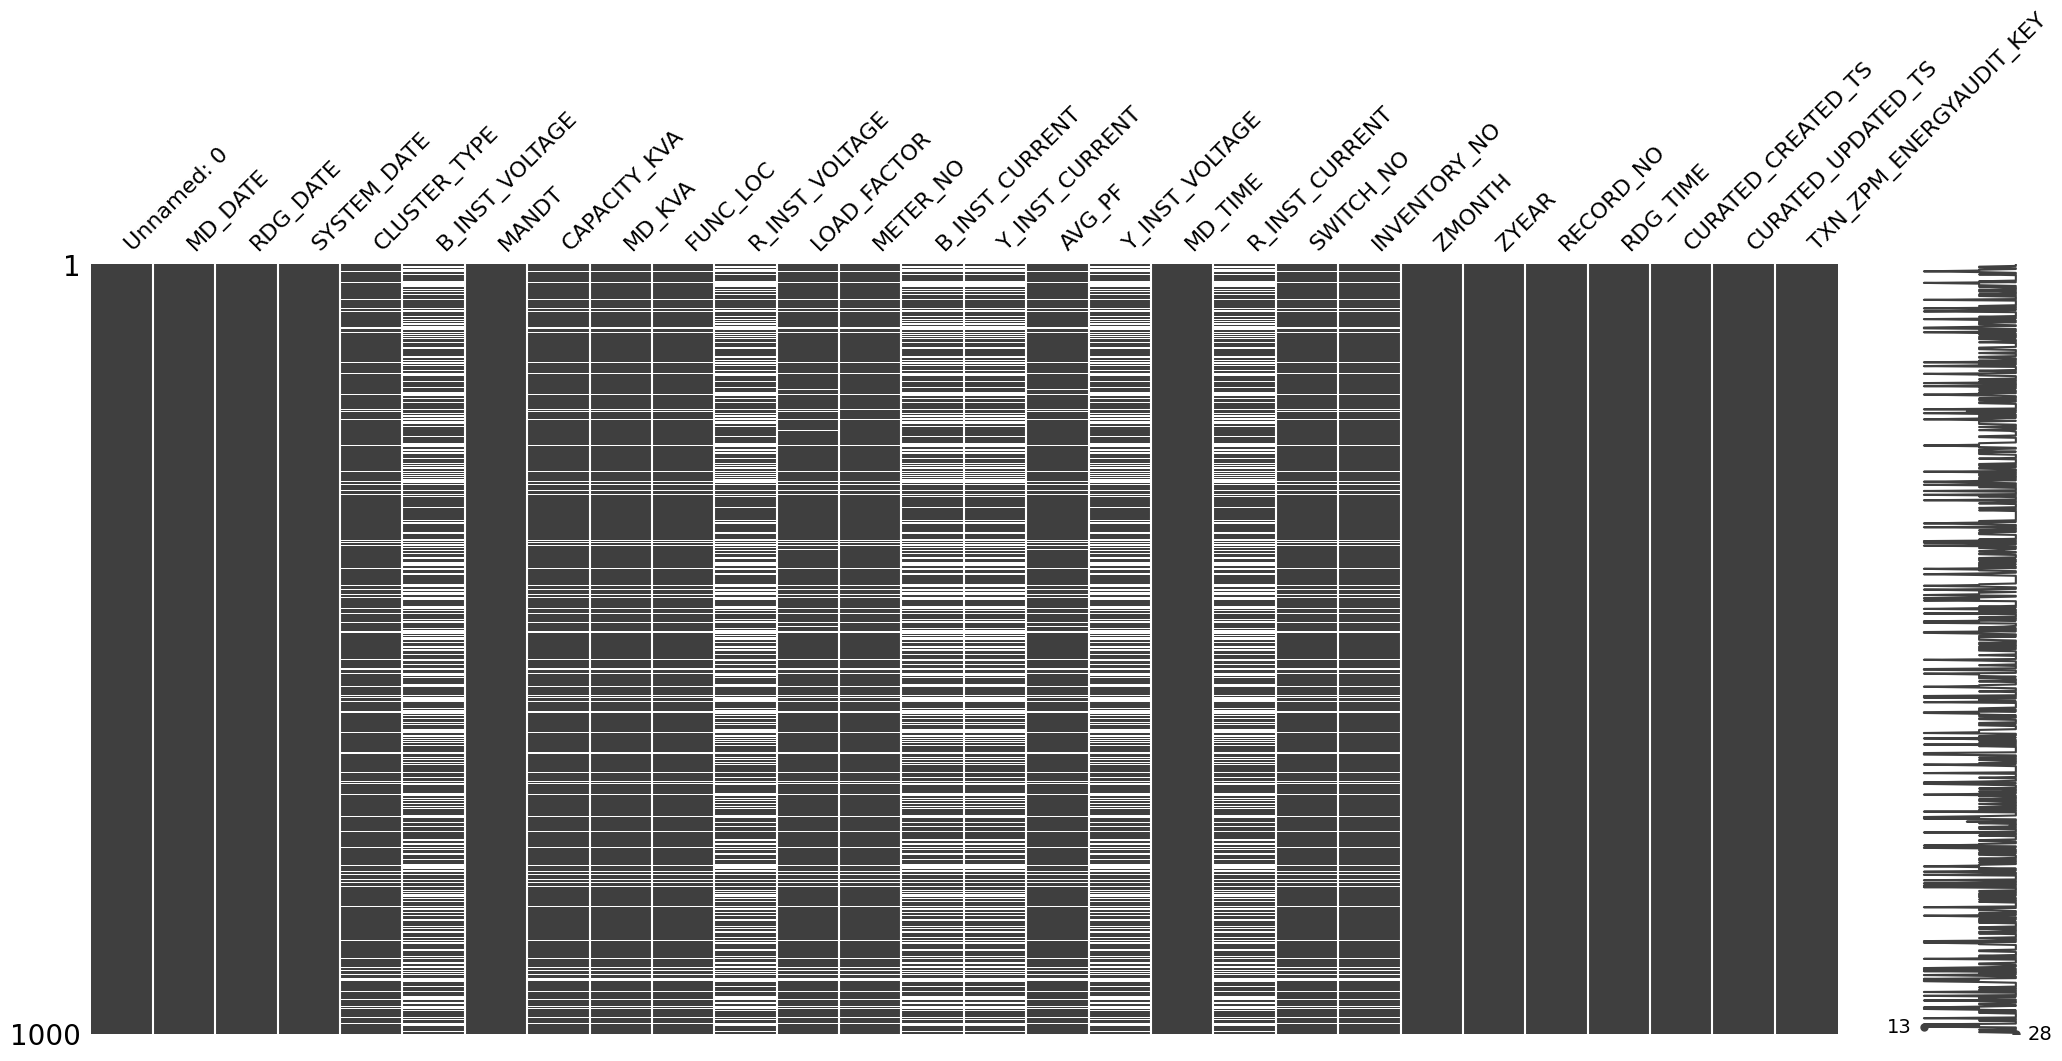

In [6]:
import missingno as msno
import matplotlib.pyplot as plt
print(" Visualizing Missing Values for SCADA:")
msno.matrix(df_energy.sample(min(len(df_energy), 1000)))
plt.show()


Bar Chart of Missing Values per Attribute:


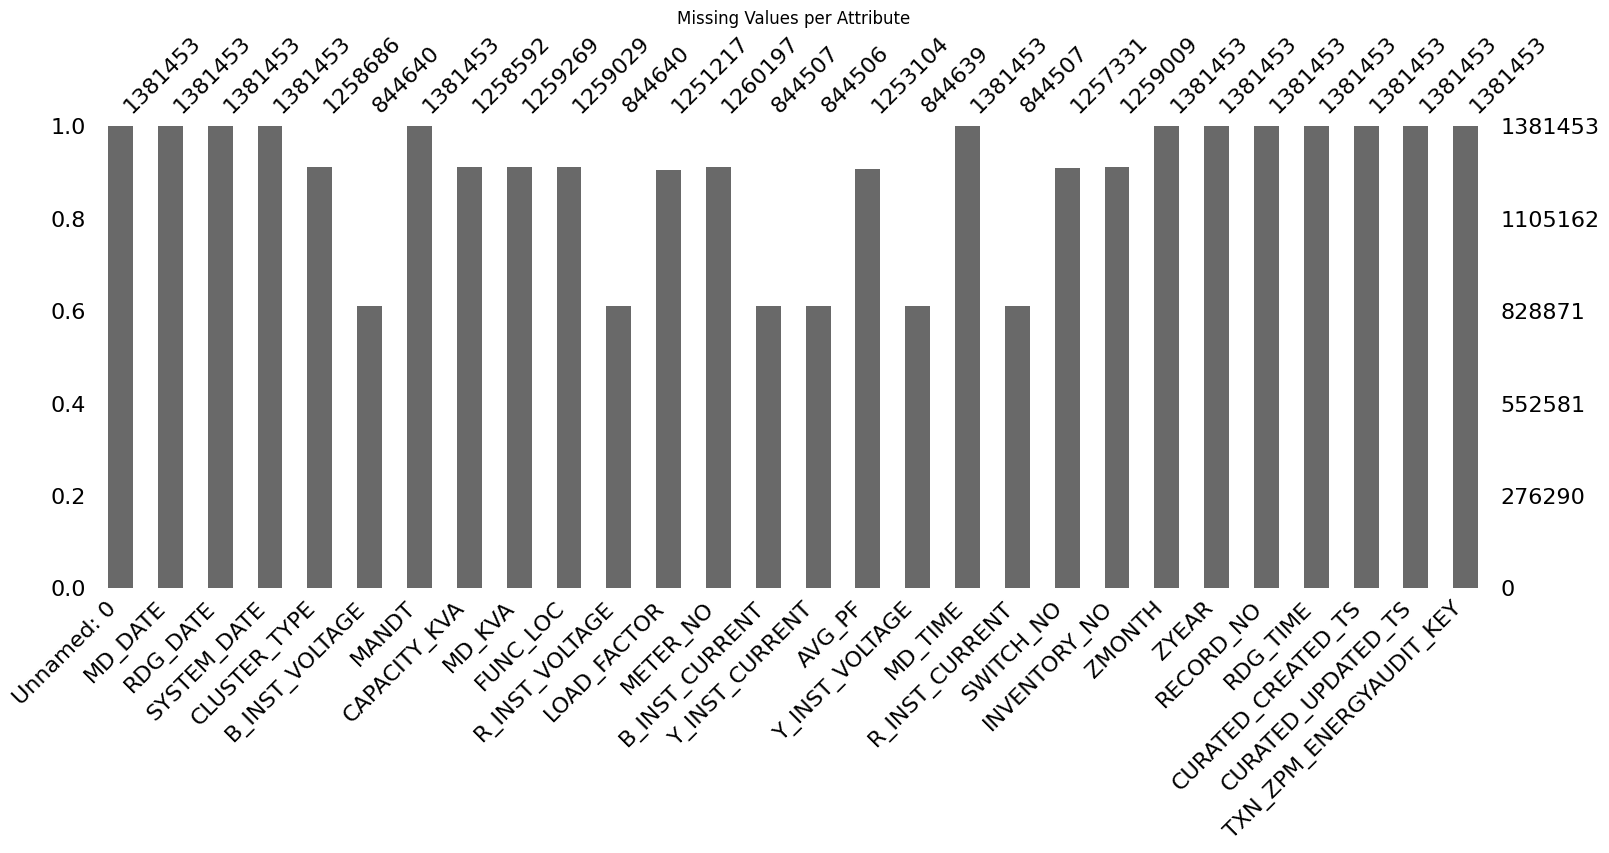

In [7]:
print("Bar Chart of Missing Values per Attribute:")
msno.bar(df_energy, figsize=(18, 6))
plt.title("Missing Values per Attribute")
plt.show()

In [8]:
df_energy_HT = pd.read_csv('HTCABLE.csv', low_memory=False)


# common_meter_no = set(df_energy['FUNC_LOC']).intersection(df_energy2['DESTINATION_SSFL'])
# print(f"Number of common : {len(common_meter_no)}")

In [9]:
len(df_energy['FUNC_LOC'].unique())


7030

In [10]:
df_11 = pd.read_excel('/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/final_two_column_with_rank_11.xlsx')

In [11]:

from pathlib import Path
from typing import Optional
import pandas as pd


def extract_feeder_id(value: str | int | float | None) -> Optional[str]:
    """
    Return the token after the 2nd underscore.
    Example: 'AMBVLI_11kV_19556' ➜ '19556'
    """
    if not isinstance(value, str):
        value = str(value) if value is not None else ""
    parts = value.split("_")
    return parts[2] if len(parts) >= 3 else None

In [12]:
def extract_feeder_id2(value: str | int | float | None) -> Optional[str]:
    """
    Return the token after the 2nd underscore only if the middle token is '11kV'.
    Example: 'AMBVLI_11kV_19556' ➜ '19556'
    """
    if not isinstance(value, str):
        value = str(value) if value is not None else ""
    parts = value.split("_")
    if len(parts) >= 3 and parts[1] == '11kV':
        return parts[2]
    return None

In [13]:
source_switch = df_11['FROM_TO'].dropna().apply(extract_feeder_id2).dropna().unique().tolist()

In [14]:
df_newfile = pd.read_csv('/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/FINAL_FILE_SWITCHS.csv', low_memory=False)

In [15]:
pd.DataFrame({'SWITCH_ID': source_switch}).to_csv('FINAL_FILE_SWITCHS.csv', index=False)

In [16]:
len(df_11['DESTINATION_LOCATION'].unique())    

5941

In [17]:
# Find the intersection of unique values between the two columns
dest_locations = set(df_11['DESTINATION_LOCATION'].dropna().unique())
func_locs = set(df_energy['FUNC_LOC'].dropna().unique())

common_locations = dest_locations.intersection(func_locs)
print(f"Number of matching values: {len(common_locations)}")
not_matching_locations = dest_locations.difference(func_locs)
print(f"Number of not matching values: {len(not_matching_locations)}")

Number of matching values: 5465
Number of not matching values: 475


In [18]:
source_switch = set(df_energy['SWITCH_NO'].dropna().unique())
source_switch_new = set(df_newfile['SWITCH_ID'].dropna().unique())
common_switches = source_switch.intersection(source_switch_new)
print(f"Number of common switches: {len(common_switches)}")

Number of common switches: 6395


In [19]:
len(df_newfile)

13745

In [20]:



common_meter_no = set(df_energy['SWITCH_NO']).intersection(df_energy_HT['SOURCE_SWITCH_ID'])
print(f"Number of common : {len(common_meter_no)}")

Number of common : 8143


In [21]:
len(df_energy['SWITCH_NO'].unique())

10825

In [22]:
len(df_energy_HT['SOURCE_SWITCH_ID'].unique())

18525

In [23]:
no_dt_load = df_11[df_11["DESTINATION_LOCATION"].notna() & df_11["DT_LOAD"].isna()]
print(len(no_dt_load))

870


In [24]:
same_location_count = no_dt_load[no_dt_load["DESTINATION_LOCATION"] == no_dt_load["SOURCE_LOCATION"]].shape[0]
print("Number of rows with DESTINATION_LOCATION equal to SOURCE_LOCATION:", same_location_count)

Number of rows with DESTINATION_LOCATION equal to SOURCE_LOCATION: 257


In [25]:
len(no_dt_load['DESTINATION_LOCATION'].unique())


475

In [26]:
len(no_dt_load['SOURCE_LOCATION'].unique())

601

In [27]:
len(df_11['DESTINATION_LOCATION'])

14045

In [28]:
no_dt_load

,FEEDER_ID,FROM_TO,SOURCE_LOCATION,DESTINATION_LOCATION,RANK,LATEST_DT_DATE,DT_LOAD
24,15452,15452-44097,1S-MH-MU-ZST-RSTN-24TH,1S-MH-MU-ZST-CL03-1207,0,NaT,NaN
25,15452,44100-37567,1S-MH-MU-ZST-CL03-1207,1S-MH-MU-ZST-CL03-1207,1,NaT,NaN
28,15452,37569-HTConsumer,1S-MH-MU-ZST-CL03-1207,1S-MH-MU-ZST-CL03-1207,1,NaT,NaN
37,15452,41902-43307,1S-MH-MU-ZST-RSTN-BAND,1S-MH-MU-ZST-CL01-1398,4,NaT,NaN
54,15452,32889-44229,1S-MH-MU-ZST-CL02-0865,1S-MH-MU-ZST-CL02-0996,10,NaT,NaN
...,...,...,...,...,...,...,...
13910,40864,43925-07247,1S-MH-MU-ZST-CL03-0448,1S-MH-MU-ZST-CL03-0448,3,NaT,NaN
13925,40866,12437-43363,1S-MH-MU-ZSC-CL05-2834,1S-MH-MU-ZSC-CL05-3645,2,NaT,NaN
13927,40866,43364-DT,1S-MH-MU-ZSC-CL05-3645,1S-MH-MU-ZSC-CL05-3645,3,NaT,NaN
13967,40870,12872-19218,1S-MH-MU-ZSC-CL05-2852,1S-MH-MU-ZSC-CL05-2868,5,NaT,NaN


In [29]:
same = df_11['SOURCE_LOCATION'].eq(df_11['DESTINATION_LOCATION'])

In [30]:
print("Number of rows where SOURCE_LOCATION and DESTINATION_LOCATION are the same: ")
print(same.sum())

Number of rows where SOURCE_LOCATION and DESTINATION_LOCATION are the same: 
6408


In [32]:
col = df_energy['FUNC_LOC']=='1S-MH-MU-ZET-CL11-9488'

In [36]:
col.unique()

array([False])

In [41]:
unique_values = df_energy_HT['LABELTEXT'].dropna()
print(unique_values.shape[0])

54479


In [42]:
len(df_energy_HT['LABELTEXT'])

54777

In [ ]:
trans = df_energy_HT['FEEDERID']=='TRANSMISSIO'

In [49]:
p = 0
for index, row in df_energy_HT.iterrows():
    if row['COMMENTS'] == 'SWITCHING DEVICE TO DT':
        print(f"Row {index} is a transmission cable.")
        p += 1
    else:
        print(f"Row {index} is not a transmission cable.")

Row 0 is not a transmission cable.
Row 1 is not a transmission cable.
Row 2 is not a transmission cable.
Row 3 is not a transmission cable.
Row 4 is not a transmission cable.
Row 5 is not a transmission cable.
Row 6 is not a transmission cable.
Row 7 is not a transmission cable.
Row 8 is not a transmission cable.
Row 9 is not a transmission cable.
Row 10 is not a transmission cable.
Row 11 is not a transmission cable.
Row 12 is not a transmission cable.
Row 13 is not a transmission cable.
Row 14 is not a transmission cable.
Row 15 is not a transmission cable.
Row 16 is not a transmission cable.
Row 17 is not a transmission cable.
Row 18 is not a transmission cable.
Row 19 is not a transmission cable.
Row 20 is not a transmission cable.
Row 21 is not a transmission cable.
Row 22 is not a transmission cable.
Row 23 is not a transmission cable.
Row 24 is not a transmission cable.
Row 25 is not a transmission cable.
Row 26 is not a transmission cable.
Row 27 is not a transmission cable.
Ro

In [50]:
p

7493

In [3]:
im[input("Enter a number: ")]

NameError: name 'im' is not defined